In [1]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import MaxPooling2D, GlobalAveragePooling2D, Concatenate, DepthwiseConv2D, Lambda, Reshape, Layer, add, Dense, multiply

from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import skimage
import skimage.transform
import cv2

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
!nvidia-smi

Sat May 15 09:41:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 446.14       Driver Version: 446.14       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX150      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8    N/A /  N/A |     64MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [3]:
!nvidia-smi

Wed Dec 08 22:41:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 446.14       Driver Version: 446.14       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX150      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P0    N/A /  N/A |     64MiB /  2048MiB |      3%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

# 1. Data Exploration

In [2]:
img1 = cv2.imread("./img150/126.png")
img2 = cv2.imread("./img150/0126_pix.png")
print(img1.shape,img2.shape)

(828, 542, 3) (826, 540, 3)


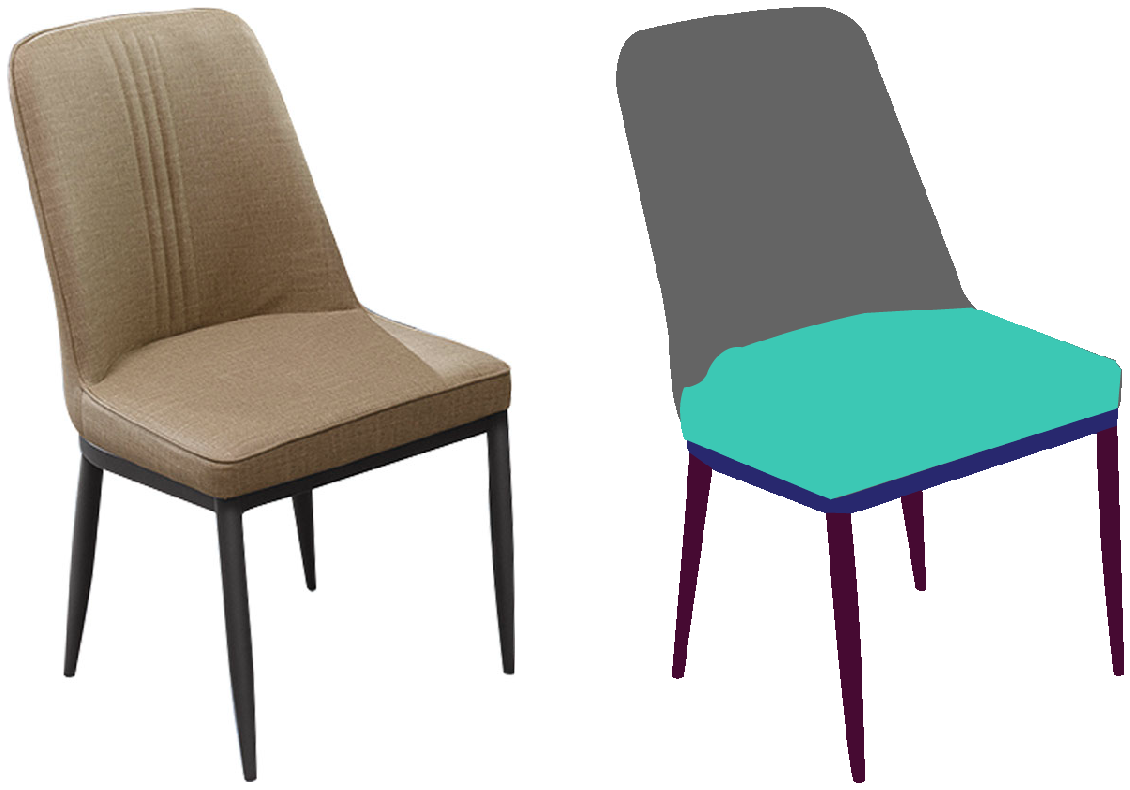

In [3]:
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img2)

In [5]:
src_images=[]; tar_images=[]
size=(256,256)
for i in range(124):
    s1="./img150/"+str(126+i)+".png"
    s2="./img150/0"+str(126+i)+"_pix.png"
    pixels1 = load_img(s1, target_size=size)
    pixels2 = load_img(s2, target_size=size)
    pixels1 = img_to_array(pixels1)
    pixels2 = img_to_array(pixels2)
    src_images.append(pixels1)
    tar_images.append(pixels2)
    print(i+126)
    print(img1.shape,img2.shape)
    i+=1

126
(828, 542, 3) (826, 540, 3)
127
(828, 542, 3) (826, 540, 3)
128
(828, 542, 3) (826, 540, 3)
129
(828, 542, 3) (826, 540, 3)
130
(828, 542, 3) (826, 540, 3)
131
(828, 542, 3) (826, 540, 3)
132
(828, 542, 3) (826, 540, 3)
133
(828, 542, 3) (826, 540, 3)
134
(828, 542, 3) (826, 540, 3)
135
(828, 542, 3) (826, 540, 3)
136
(828, 542, 3) (826, 540, 3)
137
(828, 542, 3) (826, 540, 3)
138
(828, 542, 3) (826, 540, 3)
139
(828, 542, 3) (826, 540, 3)
140
(828, 542, 3) (826, 540, 3)
141
(828, 542, 3) (826, 540, 3)
142
(828, 542, 3) (826, 540, 3)
143
(828, 542, 3) (826, 540, 3)
144
(828, 542, 3) (826, 540, 3)
145
(828, 542, 3) (826, 540, 3)
146
(828, 542, 3) (826, 540, 3)
147
(828, 542, 3) (826, 540, 3)
148
(828, 542, 3) (826, 540, 3)
149
(828, 542, 3) (826, 540, 3)
150
(828, 542, 3) (826, 540, 3)
151
(828, 542, 3) (826, 540, 3)
152
(828, 542, 3) (826, 540, 3)
153
(828, 542, 3) (826, 540, 3)
154
(828, 542, 3) (826, 540, 3)
155
(828, 542, 3) (826, 540, 3)
156
(828, 542, 3) (826, 540, 3)
157
(828

In [6]:
# save as compressed numpy array
filename = 'img150.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)

Saved dataset:  img150.npz


Loaded:  (124, 256, 256, 3) (124, 256, 256, 3)


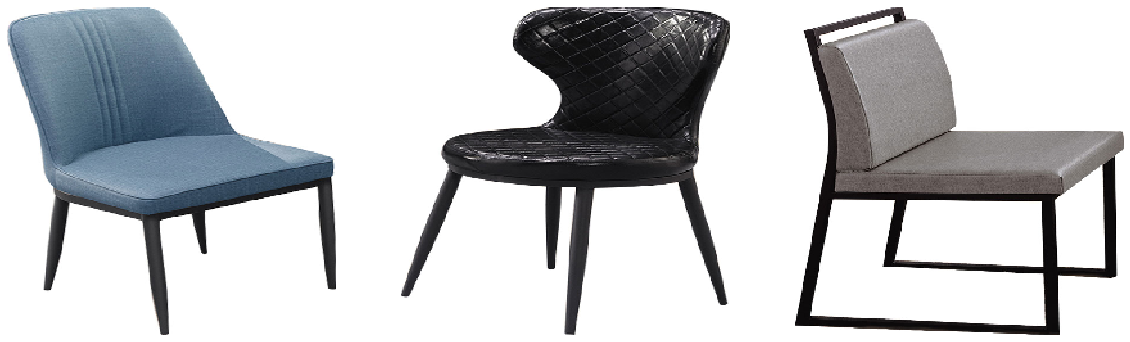

In [7]:
# load the prepared dataset
from numpy import load
import matplotlib.pyplot as plt
%matplotlib inline
# load the dataset
data = load('img150.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
plt.figure(figsize=(20,20))
for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + i)
    plt.axis('off')
    plt.imshow(src_images[i].astype('uint8'))

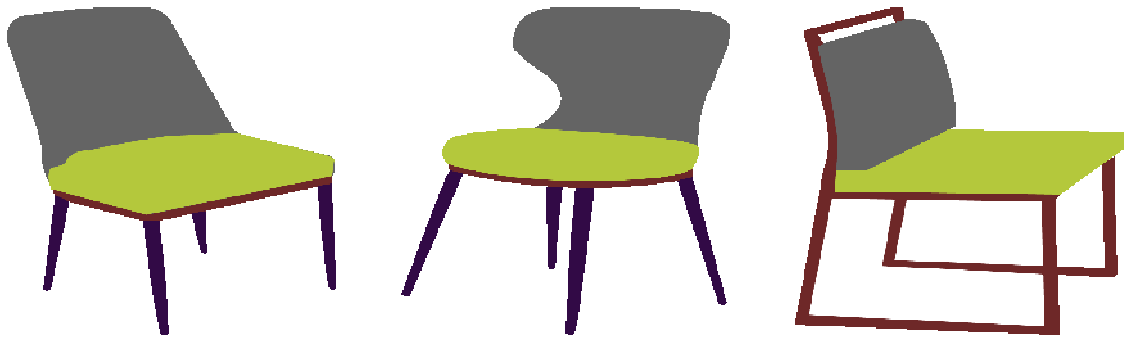

In [8]:
# plot target image
plt.figure(figsize=(20,20))
for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + n_samples + i)
    plt.axis('off')
    plt.imshow(tar_images[i].astype('uint8'))

A plot of three image pairs is also created showing the satellite images on the top and Google map images on the bottom.
We can see that satellite images are quite complex and that although the Google map images are much simpler, they have color codings for things like major roads, water, and parks.

# 2. Model-Pix2Pix

## 2.1 Discriminator

In [9]:
def define_discriminator(image_shape):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # source image input
    in_src_image = Input(shape=image_shape)
    # target image input
    in_target_image = Input(shape=image_shape)
    # concatenate images channel-wise
    merged = Concatenate()([in_src_image, in_target_image])
    # C64
    d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
    d = LeakyReLU(alpha=0.2)(d)
    # C128
    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C256
    d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C512
    d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # second last output layer
    d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # patch output
    d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    patch_out = Activation('sigmoid')(d)
    # define model
    model = Model([in_src_image, in_target_image], patch_out)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
    return model

## 2.2 Generator

In [10]:
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True, SE=False):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add downsampling layer
    g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # conditionally add batch normalization
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    # leaky relu activation
    g = LeakyReLU(alpha=0.2)(g)
    return g

In [11]:
# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add upsampling layer
    g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # add batch normalization
    g = BatchNormalization()(g, training=True)
    # conditionally add dropout
    #if dropout:
        #g = Dropout(0.5)(g, training=True)
    # merge with skip connection
    g = Concatenate()([g, skip_in])
    # relu activation
    g = Activation('relu')(g)
    return g

In [12]:
# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # image input
    in_image = Input(shape=image_shape)
    # encoder model
    e1 = define_encoder_block(in_image, 64, batchnorm=False, SE=True)
    e2 = define_encoder_block(e1, 128, SE=True)
    e3 = define_encoder_block(e2, 256, SE=True)
    e4 = define_encoder_block(e3, 512, SE=True)
    e5 = define_encoder_block(e4, 512, SE=True)
    e6 = define_encoder_block(e5, 512, SE=True)
    e7 = define_encoder_block(e6, 512, SE=True)
    # bottleneck, no batch norm and relu
    b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
    b = Activation('relu')(b)
    # decoder model
    d1 = decoder_block(b, e7, 512)
    d2 = decoder_block(d1, e6, 512)
    d3 = decoder_block(d2, e5, 512)
    d4 = decoder_block(d3, e4, 512, dropout=False)
    d5 = decoder_block(d4, e3, 256, dropout=False)
    d6 = decoder_block(d5, e2, 128, dropout=False)
    d7 = decoder_block(d6, e1, 64, dropout=False)
    # output
    g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
    out_image = Activation('tanh')(g)
    # define model
    model = Model(in_image, out_image)
    return model

## 2.3 pix-pix GAN

In [13]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
    # make weights in the discriminator not trainable
    for layer in d_model.layers:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = False
    # define the source image
    in_src = Input(shape=image_shape)
    # connect the source image to the generator input
    gen_out = g_model(in_src)
    # connect the source input and generator output to the discriminator input
    dis_out = d_model([in_src, gen_out])
    # src image as input, generated image and classification output
    model = Model(in_src, [dis_out, gen_out])
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
    return model

# 3. Model Training

In [14]:
# load and prepare training images
def load_real_samples(filename):
    # load compressed ararys
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

In [15]:
# load image data
dataset = load_real_samples('img150.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)

Loaded (124, 256, 256, 3) (124, 256, 256, 3)


In [16]:
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
image_shape

(256, 256, 3)

In [17]:
def generate_real_samples(dataset, n_samples, patch_shape):
    # unpack dataset
    trainA, trainB = dataset
    # choose random instances
    ix = randint(0, trainA.shape[0], n_samples)
    # retrieve selected images
    X1, X2 = trainA[ix], trainB[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, patch_shape, patch_shape, 1))
    return [X1, X2], y

In [18]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
    # generate fake instance
    X = g_model.predict(samples)
    # create 'fake' class labels (0)
    y = zeros((len(X), patch_shape, patch_shape, 1))
    return X, y

In [19]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
    # select a sample of input images
    [X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
    # generate a batch of fake samples
    X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
    # scale all pixels from [-1,1] to [0,1]
    X_realA = (X_realA + 1) / 2.0
    X_realB = (X_realB + 1) / 2.0
    X_fakeB = (X_fakeB + 1) / 2.0
    # plot real source images
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X_realA[i])
    # plot generated target image
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + n_samples + i)
        pyplot.axis('off')
        pyplot.imshow(X_fakeB[i])
    # plot real target image
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
        pyplot.axis('off')
        pyplot.imshow(X_realB[i])
    # save plot to file
    filename1 = 'plot_%06d.png' % (step+1)
    pyplot.savefig(filename1)
    pyplot.close()
    # save the generator model
    filename2 = 'model_%06d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))

In [20]:
trainA, trainB = dataset
len(trainA) / 1

124.0

In [35]:
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
    # determine the output square shape of the discriminator
    n_patch = d_model.output_shape[1]
    # unpack dataset
    trainA, trainB = dataset
    # calculate the number of batches per training epoch
    bat_per_epo = int(len(trainA) / n_batch)
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    # manually enumerate epochs
    for i in range(n_steps):
        # select a batch of real samples
        [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
        # generate a batch of fake samples
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
        # update discriminator for real samples
        d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
        # update discriminator for generated samples
        d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
        # update the generator
        g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        # summarize performance
        print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
        # summarize model performance
        if (i+1) % (bat_per_epo * 1) == 0:
            summarize_performance(i, g_model, dataset)

In [36]:
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)

In [37]:
d_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
concatenate_17 (Concatenate)    (None, 256, 256, 6)  0           input_9[0][0]                    
                                                                 input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 128, 128, 64) 6208        concatenate_17[0][0]             
__________

In [38]:
g_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 128, 128, 64) 3136        input_11[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_30 (LeakyReLU)      (None, 128, 128, 64) 0           conv2d_35[0][0]                  
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 64, 64, 128)  131200      leaky_re_lu_30[0][0]             
__________________________________________________________________________________________________
batch_norm

In [39]:
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)

In [40]:
gan_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
model_8 (Model)                 (None, 256, 256, 3)  54429315    input_12[0][0]                   
__________________________________________________________________________________________________
model_7 (Model)                 (None, 16, 16, 1)    6968257     input_12[0][0]                   
                                                                 model_8[1][0]                    
Total params: 61,397,572
Trainable params: 54,422,275
Non-trainable params: 6,975,297
__________________________________________________________________________________________________


In [41]:
# train model
train(d_model, g_model, gan_model, dataset, n_epochs=50)

C:\Users\user\Anaconda3\lib\site-packages\keras\engine\training.py:478: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, d1[0.324] d2[1.487] g[77.621]
>2, d1[0.283] d2[0.873] g[76.986]
>3, d1[0.309] d2[0.704] g[69.787]
>4, d1[0.349] d2[0.836] g[61.782]
>5, d1[0.501] d2[0.508] g[55.571]
>6, d1[0.378] d2[0.489] g[68.275]
>7, d1[0.392] d2[0.468] g[52.844]
>8, d1[0.343] d2[0.412] g[54.384]
>9, d1[0.385] d2[0.461] g[51.196]
>10, d1[0.452] d2[0.403] g[73.696]
>11, d1[0.342] d2[0.426] g[44.405]
>12, d1[0.376] d2[0.398] g[49.571]
>13, d1[0.384] d2[0.396] g[39.879]
>14, d1[0.475] d2[0.391] g[37.027]
>15, d1[0.339] d2[0.367] g[36.710]
>16, d1[0.315] d2[0.362] g[39.240]
>17, d1[0.341] d2[0.357] g[41.256]
>18, d1[0.526] d2[0.336] g[67.384]
>19, d1[0.306] d2[0.419] g[32.159]
>20, d1[0.326] d2[0.296] g[38.726]
>21, d1[0.308] d2[0.264] g[36.243]
>22, d1[0.330] d2[0.335] g[31.318]
>23, d1[0.366] d2[0.304] g[31.465]
>24, d1[0.259] d2[0.330] g[47.887]
>25, d1[0.470] d2[0.316] g[28.897]
>26, d1[0.364] d2[0.274] g[62.075]
>27, d1[0.294] d2[0.298] g[28.305]
>28, d1[0.263] d2[0.158] g[25.935]
>29, d1[0.259] d2[0.213] g[23

>232, d1[0.046] d2[0.056] g[23.267]
>233, d1[0.060] d2[0.201] g[18.009]
>234, d1[0.674] d2[0.481] g[12.385]
>235, d1[0.019] d2[0.034] g[55.357]
>236, d1[0.441] d2[0.189] g[13.342]
>237, d1[0.144] d2[0.244] g[9.971]
>238, d1[0.141] d2[0.041] g[9.460]
>239, d1[0.119] d2[0.089] g[11.790]
>240, d1[0.042] d2[0.066] g[9.185]
>241, d1[0.050] d2[0.204] g[10.271]
>242, d1[0.263] d2[0.277] g[12.506]
>243, d1[0.167] d2[0.076] g[11.514]
>244, d1[0.025] d2[0.113] g[13.610]
>245, d1[0.193] d2[0.084] g[13.748]
>246, d1[0.067] d2[0.402] g[13.481]
>247, d1[0.978] d2[0.069] g[8.145]
>248, d1[0.191] d2[0.318] g[10.440]
>Saved: plot_000248.png and model_000248.h5
>249, d1[0.107] d2[0.331] g[10.810]
>250, d1[0.300] d2[0.114] g[11.742]
>251, d1[0.107] d2[0.430] g[12.901]
>252, d1[0.582] d2[0.117] g[10.870]
>253, d1[0.024] d2[0.507] g[10.803]
>254, d1[0.416] d2[0.091] g[7.816]
>255, d1[0.062] d2[0.119] g[11.719]
>256, d1[0.095] d2[0.195] g[11.221]
>257, d1[0.145] d2[0.133] g[10.893]
>258, d1[0.052] d2[0.164]

>460, d1[0.054] d2[0.740] g[9.431]
>461, d1[0.674] d2[0.208] g[8.777]
>462, d1[0.395] d2[0.626] g[8.915]
>463, d1[0.080] d2[0.021] g[51.072]
>464, d1[0.146] d2[0.147] g[12.340]
>465, d1[0.739] d2[0.292] g[8.599]
>466, d1[0.066] d2[0.130] g[8.369]
>467, d1[0.030] d2[0.034] g[28.340]
>468, d1[0.081] d2[0.132] g[8.316]
>469, d1[0.153] d2[0.096] g[10.863]
>470, d1[0.079] d2[0.241] g[10.252]
>471, d1[0.361] d2[0.518] g[9.984]
>472, d1[0.534] d2[0.310] g[10.230]
>473, d1[0.075] d2[0.152] g[9.975]
>474, d1[0.400] d2[0.436] g[8.401]
>475, d1[0.251] d2[0.061] g[11.231]
>476, d1[0.077] d2[0.132] g[16.799]
>477, d1[0.378] d2[0.593] g[11.215]
>478, d1[0.215] d2[0.084] g[8.206]
>479, d1[0.025] d2[0.061] g[13.079]
>480, d1[0.113] d2[0.135] g[9.740]
>481, d1[0.015] d2[0.033] g[49.939]
>482, d1[0.009] d2[0.114] g[19.005]
>483, d1[0.346] d2[0.207] g[11.170]
>484, d1[0.226] d2[0.157] g[11.205]
>485, d1[0.065] d2[0.153] g[8.040]
>486, d1[0.063] d2[0.029] g[9.765]
>487, d1[0.119] d2[0.054] g[9.120]
>488, 

>688, d1[0.089] d2[0.042] g[20.186]
>689, d1[0.011] d2[0.197] g[18.348]
>690, d1[0.411] d2[0.175] g[8.415]
>691, d1[0.388] d2[0.599] g[10.368]
>692, d1[0.076] d2[0.032] g[9.368]
>693, d1[0.207] d2[0.105] g[7.986]
>694, d1[0.028] d2[0.033] g[12.644]
>695, d1[0.167] d2[0.235] g[8.763]
>696, d1[0.328] d2[0.163] g[7.805]
>697, d1[0.059] d2[0.067] g[8.372]
>698, d1[0.010] d2[0.476] g[9.742]
>699, d1[0.094] d2[0.090] g[19.637]
>700, d1[0.413] d2[0.385] g[10.392]
>701, d1[1.715] d2[0.065] g[6.578]
>702, d1[0.049] d2[0.101] g[8.532]
>703, d1[0.015] d2[0.423] g[12.994]
>704, d1[0.568] d2[0.052] g[6.921]
>705, d1[0.176] d2[0.291] g[8.035]
>706, d1[0.052] d2[0.029] g[9.192]
>707, d1[0.380] d2[0.203] g[7.452]
>708, d1[0.007] d2[0.129] g[8.865]
>709, d1[1.219] d2[0.623] g[6.902]
>710, d1[0.019] d2[0.098] g[9.757]
>711, d1[0.022] d2[0.086] g[8.419]
>712, d1[0.027] d2[0.055] g[28.182]
>713, d1[0.260] d2[0.141] g[10.616]
>714, d1[0.018] d2[0.125] g[13.267]
>715, d1[0.050] d2[0.170] g[8.208]
>716, d1[0

>918, d1[0.258] d2[0.439] g[8.683]
>919, d1[0.041] d2[0.057] g[10.962]
>920, d1[0.130] d2[0.067] g[8.315]
>921, d1[0.032] d2[0.071] g[13.613]
>922, d1[0.726] d2[1.188] g[8.411]
>923, d1[0.076] d2[0.302] g[9.238]
>924, d1[0.388] d2[0.113] g[11.718]
>925, d1[0.373] d2[0.180] g[7.926]
>926, d1[0.013] d2[0.312] g[12.168]
>927, d1[0.061] d2[0.163] g[8.193]
>928, d1[1.076] d2[0.129] g[9.566]
>929, d1[0.127] d2[0.275] g[8.157]
>930, d1[0.529] d2[0.788] g[8.196]
>931, d1[0.039] d2[0.216] g[9.525]
>932, d1[0.124] d2[0.031] g[19.561]
>933, d1[1.453] d2[0.083] g[6.108]
>934, d1[0.050] d2[0.316] g[9.480]
>935, d1[0.120] d2[0.102] g[7.939]
>936, d1[0.140] d2[0.052] g[12.765]
>937, d1[0.057] d2[0.564] g[9.153]
>938, d1[0.098] d2[0.074] g[8.280]
>939, d1[0.057] d2[0.111] g[8.905]
>940, d1[0.369] d2[0.168] g[11.927]
>941, d1[1.672] d2[0.870] g[6.849]
>942, d1[0.258] d2[0.100] g[10.649]
>943, d1[0.531] d2[0.443] g[5.830]
>944, d1[0.012] d2[0.154] g[46.720]
>945, d1[0.069] d2[0.204] g[11.736]
>946, d1[0

>1144, d1[0.065] d2[0.165] g[8.002]
>1145, d1[0.092] d2[0.160] g[10.401]
>1146, d1[0.190] d2[0.058] g[8.305]
>1147, d1[0.211] d2[0.144] g[7.006]
>1148, d1[0.112] d2[0.378] g[7.685]
>1149, d1[0.178] d2[0.156] g[7.064]
>1150, d1[0.417] d2[0.963] g[7.745]
>1151, d1[0.217] d2[0.067] g[7.218]
>1152, d1[0.022] d2[0.130] g[46.061]
>1153, d1[0.268] d2[0.136] g[12.595]
>1154, d1[0.453] d2[0.403] g[7.090]
>1155, d1[0.023] d2[0.053] g[11.273]
>1156, d1[0.007] d2[0.061] g[20.532]
>1157, d1[0.016] d2[0.042] g[44.070]
>1158, d1[0.604] d2[0.406] g[9.292]
>1159, d1[0.174] d2[0.112] g[7.116]
>1160, d1[0.003] d2[0.217] g[16.691]
>1161, d1[0.094] d2[0.034] g[8.958]
>1162, d1[0.377] d2[0.101] g[6.509]
>1163, d1[0.071] d2[0.165] g[7.892]
>1164, d1[0.021] d2[0.063] g[9.326]
>1165, d1[0.012] d2[0.278] g[10.971]
>1166, d1[0.299] d2[0.050] g[6.729]
>1167, d1[0.006] d2[0.053] g[19.201]
>1168, d1[0.076] d2[0.045] g[8.448]
>1169, d1[0.079] d2[0.170] g[7.206]
>1170, d1[0.226] d2[1.156] g[9.729]
>1171, d1[0.042] d2

>1368, d1[0.178] d2[0.129] g[6.835]
>1369, d1[0.035] d2[0.461] g[10.908]
>1370, d1[0.544] d2[0.152] g[6.181]
>1371, d1[0.011] d2[0.109] g[18.733]
>1372, d1[0.182] d2[0.241] g[7.341]
>1373, d1[0.060] d2[0.117] g[7.894]
>1374, d1[0.084] d2[0.056] g[12.074]
>1375, d1[0.014] d2[0.138] g[12.056]
>1376, d1[0.653] d2[0.144] g[7.337]
>1377, d1[0.047] d2[0.256] g[6.907]
>1378, d1[0.057] d2[0.089] g[10.106]
>1379, d1[0.244] d2[0.326] g[8.529]
>1380, d1[0.087] d2[0.048] g[7.807]
>1381, d1[0.014] d2[0.135] g[13.421]
>1382, d1[0.523] d2[0.290] g[5.997]
>1383, d1[0.049] d2[0.045] g[9.158]
>1384, d1[0.078] d2[0.076] g[6.289]
>1385, d1[0.012] d2[0.111] g[53.551]
>1386, d1[0.403] d2[0.326] g[7.660]
>1387, d1[0.145] d2[0.240] g[6.419]
>1388, d1[0.053] d2[0.126] g[7.151]
>1389, d1[0.464] d2[0.602] g[7.914]
>1390, d1[0.187] d2[0.115] g[10.366]
>1391, d1[0.030] d2[0.031] g[8.149]
>1392, d1[0.128] d2[0.233] g[7.589]
>1393, d1[0.464] d2[0.828] g[7.342]
>1394, d1[0.195] d2[0.069] g[7.902]
>1395, d1[0.032] d2[

>1594, d1[0.402] d2[0.562] g[5.964]
>1595, d1[0.086] d2[0.296] g[7.416]
>1596, d1[0.734] d2[0.382] g[6.554]
>1597, d1[0.578] d2[0.436] g[8.077]
>1598, d1[0.393] d2[0.287] g[5.714]
>1599, d1[0.135] d2[0.229] g[7.307]
>1600, d1[0.165] d2[0.104] g[6.423]
>1601, d1[0.400] d2[0.325] g[7.410]
>1602, d1[0.010] d2[0.151] g[19.545]
>1603, d1[0.679] d2[0.132] g[5.004]
>1604, d1[0.009] d2[0.288] g[39.637]
>1605, d1[0.157] d2[0.337] g[7.116]
>1606, d1[0.845] d2[0.286] g[5.742]
>1607, d1[0.229] d2[0.142] g[6.426]
>1608, d1[0.124] d2[0.575] g[7.091]
>1609, d1[0.238] d2[0.171] g[6.650]
>1610, d1[0.351] d2[0.640] g[6.782]
>1611, d1[0.300] d2[0.140] g[7.147]
>1612, d1[0.379] d2[0.532] g[6.873]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_001612.png and model_001612.h5
>1613, d1[0.083] d2[0.035] g[7.630]
>1614, d1[0.085] d2[0.116] g[8.183]
>1615, d1[0.315] d2[0.224] g[6.361]
>1616, d1[0.323] d2[0.370] g[8.555]
>1617, d1[0.018] d2[0.055] g[10.727]
>1618, d1[0.077] d2[0.063] g[16.711]
>1619, d1[0.020] d2[0.058] g[11.997]
>1620, d1[0.343] d2[0.515] g[6.772]
>1621, d1[0.206] d2[0.168] g[7.457]
>1622, d1[0.174] d2[0.116] g[5.982]
>1623, d1[0.049] d2[0.291] g[8.231]
>1624, d1[0.241] d2[0.220] g[7.457]
>1625, d1[0.075] d2[0.086] g[7.092]
>1626, d1[0.140] d2[0.075] g[10.088]
>1627, d1[0.205] d2[0.239] g[7.115]
>1628, d1[0.060] d2[0.309] g[6.517]
>1629, d1[0.621] d2[0.112] g[5.845]
>1630, d1[0.087] d2[0.131] g[7.080]
>1631, d1[0.006] d2[0.306] g[7.851]
>1632, d1[0.145] d2[0.090] g[6.176]
>1633, d1[0.067] d2[0.077] g[7.145]
>1634, d1[0.050] d2[0.100] g[6.018]
>1635, d1[0.066] d2[0.142] g[6.923]
>1636, d1[0.052] d2[0.071] g[9.479]
>1637, d1[0.006] d2[0.167] g[18.962]
>1638, d1[0.429] d2[0.814] g[11.376]
>1639, d1[1.15

>1837, d1[0.016] d2[0.066] g[19.181]
>1838, d1[0.316] d2[0.679] g[16.625]
>1839, d1[0.135] d2[0.132] g[5.883]
>1840, d1[0.312] d2[0.455] g[5.279]
>1841, d1[0.009] d2[0.155] g[15.086]
>1842, d1[0.475] d2[0.175] g[5.189]
>1843, d1[0.156] d2[0.185] g[5.863]
>1844, d1[0.095] d2[0.095] g[7.630]
>1845, d1[0.254] d2[0.330] g[7.498]
>1846, d1[0.288] d2[0.203] g[9.189]
>1847, d1[0.023] d2[0.146] g[7.403]
>1848, d1[0.071] d2[0.053] g[6.358]
>1849, d1[0.169] d2[0.118] g[6.062]
>1850, d1[0.021] d2[0.057] g[8.076]
>1851, d1[0.210] d2[0.478] g[6.979]
>1852, d1[0.007] d2[0.032] g[18.901]
>1853, d1[0.193] d2[0.101] g[6.638]
>1854, d1[0.037] d2[0.135] g[7.486]
>1855, d1[0.732] d2[0.349] g[5.571]
>1856, d1[0.036] d2[0.082] g[7.005]
>1857, d1[0.188] d2[0.225] g[6.023]
>1858, d1[0.097] d2[0.202] g[8.171]
>1859, d1[0.046] d2[0.110] g[7.874]
>1860, d1[0.029] d2[0.026] g[17.150]
>Saved: plot_001860.png and model_001860.h5
>1861, d1[0.381] d2[0.160] g[6.760]
>1862, d1[0.133] d2[0.655] g[10.028]
>1863, d1[0.27

>2062, d1[0.134] d2[0.126] g[7.753]
>2063, d1[0.149] d2[0.271] g[6.072]
>2064, d1[0.447] d2[0.262] g[8.914]
>2065, d1[0.179] d2[0.214] g[6.212]
>2066, d1[0.007] d2[0.054] g[11.022]
>2067, d1[0.427] d2[0.422] g[6.766]
>2068, d1[0.079] d2[0.053] g[7.024]
>2069, d1[0.118] d2[0.173] g[8.423]
>2070, d1[0.104] d2[0.137] g[10.044]
>2071, d1[0.135] d2[0.160] g[7.405]
>2072, d1[0.030] d2[0.086] g[8.015]
>2073, d1[0.122] d2[0.069] g[6.457]
>2074, d1[0.016] d2[0.170] g[8.385]
>2075, d1[0.084] d2[0.067] g[6.603]
>2076, d1[0.045] d2[0.203] g[6.717]
>2077, d1[0.627] d2[0.894] g[8.066]
>2078, d1[0.061] d2[0.035] g[27.795]
>2079, d1[0.280] d2[0.156] g[6.244]
>2080, d1[0.188] d2[0.266] g[7.195]
>2081, d1[0.217] d2[0.196] g[6.379]
>2082, d1[0.177] d2[0.561] g[6.824]
>2083, d1[0.159] d2[0.059] g[7.116]
>2084, d1[0.554] d2[0.522] g[7.197]
>2085, d1[0.061] d2[0.113] g[5.165]
>2086, d1[0.409] d2[0.186] g[4.961]
>2087, d1[0.096] d2[0.244] g[8.546]
>2088, d1[0.035] d2[0.038] g[7.291]
>2089, d1[0.274] d2[0.378

>2287, d1[0.188] d2[0.065] g[6.663]
>2288, d1[0.070] d2[0.378] g[6.525]
>2289, d1[0.337] d2[0.080] g[5.076]
>2290, d1[0.045] d2[0.150] g[7.814]
>2291, d1[0.026] d2[0.113] g[7.677]
>2292, d1[0.031] d2[0.024] g[16.557]
>2293, d1[0.049] d2[0.047] g[7.464]
>2294, d1[0.616] d2[0.764] g[5.833]
>2295, d1[0.377] d2[0.217] g[7.366]
>2296, d1[0.210] d2[0.134] g[7.104]
>2297, d1[0.017] d2[0.290] g[7.083]
>2298, d1[0.394] d2[0.139] g[5.966]
>2299, d1[0.287] d2[0.277] g[6.539]
>2300, d1[0.005] d2[0.098] g[14.552]
>2301, d1[0.137] d2[0.074] g[6.164]
>2302, d1[0.046] d2[0.090] g[8.539]
>2303, d1[0.028] d2[0.087] g[7.062]
>2304, d1[0.049] d2[0.071] g[7.006]
>2305, d1[0.014] d2[0.041] g[15.769]
>2306, d1[0.032] d2[0.086] g[8.632]
>2307, d1[0.029] d2[0.084] g[6.812]
>2308, d1[0.123] d2[0.080] g[7.073]
>2309, d1[0.042] d2[0.104] g[7.664]
>2310, d1[0.189] d2[0.489] g[6.965]
>2311, d1[0.176] d2[0.042] g[9.298]
>2312, d1[0.061] d2[0.163] g[14.755]
>2313, d1[0.347] d2[0.179] g[7.568]
>2314, d1[0.161] d2[0.15

>2512, d1[0.015] d2[0.055] g[12.377]
>2513, d1[0.698] d2[0.564] g[6.021]
>2514, d1[0.158] d2[0.129] g[6.230]
>2515, d1[0.118] d2[0.117] g[5.860]
>2516, d1[0.062] d2[0.260] g[6.397]
>2517, d1[0.074] d2[0.055] g[8.864]
>2518, d1[0.160] d2[0.074] g[6.659]
>2519, d1[0.054] d2[0.185] g[6.063]
>2520, d1[0.080] d2[0.055] g[7.899]
>2521, d1[0.121] d2[0.262] g[7.716]
>2522, d1[0.053] d2[0.032] g[44.913]
>2523, d1[0.276] d2[0.339] g[7.131]
>2524, d1[0.406] d2[0.317] g[17.383]
>2525, d1[0.041] d2[0.043] g[10.038]
>2526, d1[0.165] d2[0.225] g[7.929]
>2527, d1[0.375] d2[0.268] g[6.688]
>2528, d1[0.106] d2[0.092] g[6.221]
>2529, d1[0.034] d2[0.308] g[8.566]
>2530, d1[0.235] d2[0.328] g[6.851]
>2531, d1[0.426] d2[0.140] g[5.150]
>2532, d1[0.149] d2[0.159] g[5.950]
>2533, d1[0.047] d2[0.086] g[6.089]
>2534, d1[0.155] d2[0.104] g[6.591]
>2535, d1[0.028] d2[0.152] g[6.761]
>2536, d1[0.039] d2[0.133] g[6.705]
>2537, d1[0.018] d2[0.040] g[15.563]
>2538, d1[0.495] d2[0.544] g[7.641]
>2539, d1[0.209] d2[0.1

>2737, d1[0.602] d2[0.105] g[14.146]
>2738, d1[0.035] d2[0.411] g[6.481]
>2739, d1[0.023] d2[0.059] g[8.935]
>2740, d1[0.040] d2[0.123] g[20.718]
>2741, d1[0.564] d2[0.154] g[5.688]
>2742, d1[0.087] d2[0.117] g[7.123]
>2743, d1[0.019] d2[0.102] g[7.928]
>2744, d1[0.038] d2[0.053] g[6.538]
>2745, d1[0.091] d2[0.046] g[7.025]
>2746, d1[0.072] d2[0.115] g[8.008]
>2747, d1[0.023] d2[0.154] g[7.578]
>2748, d1[0.155] d2[0.095] g[6.871]
>2749, d1[0.427] d2[0.388] g[5.911]
>2750, d1[0.098] d2[0.259] g[7.541]
>2751, d1[0.059] d2[0.061] g[8.908]
>2752, d1[0.262] d2[0.052] g[8.419]
>2753, d1[0.301] d2[0.853] g[6.075]
>2754, d1[0.009] d2[0.041] g[16.531]
>2755, d1[0.289] d2[0.237] g[5.723]
>2756, d1[0.108] d2[0.114] g[6.602]
>2757, d1[0.089] d2[0.113] g[5.529]
>2758, d1[0.456] d2[0.318] g[4.879]
>2759, d1[0.070] d2[0.144] g[5.942]
>2760, d1[0.025] d2[0.132] g[5.948]
>2761, d1[0.229] d2[0.451] g[6.815]
>2762, d1[1.270] d2[0.089] g[4.567]
>2763, d1[0.336] d2[0.417] g[5.780]
>2764, d1[0.122] d2[0.165

>2963, d1[0.030] d2[0.072] g[7.617]
>2964, d1[0.195] d2[0.214] g[6.900]
>2965, d1[0.151] d2[0.086] g[6.061]
>2966, d1[0.056] d2[0.045] g[6.081]
>2967, d1[0.018] d2[0.121] g[7.270]
>2968, d1[0.262] d2[0.327] g[6.835]
>2969, d1[0.045] d2[0.040] g[7.874]
>2970, d1[0.107] d2[0.061] g[6.400]
>2971, d1[0.015] d2[0.072] g[22.993]
>2972, d1[0.057] d2[0.221] g[8.011]
>2973, d1[0.118] d2[0.035] g[7.783]
>2974, d1[0.196] d2[0.194] g[6.915]
>2975, d1[0.009] d2[0.076] g[16.309]
>2976, d1[0.013] d2[0.061] g[12.182]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_002976.png and model_002976.h5
>2977, d1[0.329] d2[0.065] g[5.276]
>2978, d1[0.033] d2[0.353] g[7.706]
>2979, d1[0.164] d2[0.041] g[6.733]
>2980, d1[0.053] d2[0.042] g[49.539]
>2981, d1[0.343] d2[0.369] g[6.319]
>2982, d1[0.025] d2[0.118] g[8.827]
>2983, d1[0.145] d2[0.053] g[6.615]
>2984, d1[0.060] d2[0.194] g[6.990]
>2985, d1[0.108] d2[0.035] g[6.795]
>2986, d1[0.080] d2[0.141] g[6.413]
>2987, d1[0.010] d2[0.023] g[14.719]
>2988, d1[0.205] d2[0.196] g[7.325]
>2989, d1[0.021] d2[0.034] g[15.516]
>2990, d1[0.028] d2[0.027] g[15.337]
>2991, d1[0.022] d2[0.037] g[13.539]
>2992, d1[0.083] d2[0.093] g[6.992]
>2993, d1[0.091] d2[0.104] g[5.864]
>2994, d1[0.079] d2[0.111] g[7.098]
>2995, d1[0.065] d2[0.148] g[6.569]
>2996, d1[0.335] d2[0.238] g[6.131]
>2997, d1[0.014] d2[0.096] g[6.498]
>2998, d1[0.020] d2[0.061] g[6.460]
>2999, d1[0.027] d2[0.030] g[11.830]
>3000, d1[0.323] d2[0.251] g[7.556]
>3001, d1[0.078] d2[0.064] g[5.811]
>3002, d1[0.157] d2[0.261] g[6.544]
>3003, d1[0.02

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_003100.png and model_003100.h5
>3101, d1[0.402] d2[0.147] g[5.369]
>3102, d1[0.014] d2[0.087] g[8.063]
>3103, d1[0.058] d2[0.113] g[6.514]
>3104, d1[0.026] d2[0.058] g[6.300]
>3105, d1[0.304] d2[0.437] g[6.915]
>3106, d1[0.285] d2[0.226] g[6.234]
>3107, d1[0.085] d2[0.066] g[6.154]
>3108, d1[0.078] d2[0.066] g[6.733]
>3109, d1[0.092] d2[0.056] g[5.532]
>3110, d1[0.017] d2[0.188] g[7.014]
>3111, d1[0.085] d2[0.091] g[18.173]
>3112, d1[0.051] d2[0.080] g[6.377]
>3113, d1[0.042] d2[0.056] g[6.727]
>3114, d1[0.194] d2[0.077] g[7.441]
>3115, d1[0.019] d2[0.159] g[5.804]
>3116, d1[0.026] d2[0.082] g[6.925]
>3117, d1[0.033] d2[0.055] g[5.954]
>3118, d1[0.043] d2[0.037] g[6.896]
>3119, d1[0.217] d2[0.407] g[7.660]
>3120, d1[0.113] d2[0.118] g[5.850]
>3121, d1[0.440] d2[1.808] g[4.893]
>3122, d1[0.138] d2[0.091] g[6.326]
>3123, d1[0.070] d2[0.094] g[9.125]
>3124, d1[0.050] d2[0.108] g[8.706]
>3125, d1[0.259] d2[0.058] g[45.859]
>3126, d1[0.028] d2[0.107] g[6.083]
>3127, d1[0.111] d

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_003224.png and model_003224.h5
>3225, d1[0.017] d2[0.123] g[6.166]
>3226, d1[0.115] d2[0.075] g[6.247]
>3227, d1[0.036] d2[0.129] g[7.708]
>3228, d1[0.059] d2[0.033] g[6.205]
>3229, d1[0.240] d2[0.631] g[6.492]
>3230, d1[0.043] d2[0.022] g[13.594]
>3231, d1[0.427] d2[0.103] g[5.234]
>3232, d1[0.200] d2[0.207] g[5.411]
>3233, d1[0.008] d2[0.257] g[7.692]
>3234, d1[0.086] d2[0.045] g[7.652]
>3235, d1[0.027] d2[0.029] g[13.084]
>3236, d1[0.368] d2[0.141] g[6.428]
>3237, d1[0.039] d2[0.127] g[5.205]
>3238, d1[0.013] d2[0.194] g[6.961]
>3239, d1[0.314] d2[0.338] g[6.420]
>3240, d1[0.070] d2[0.030] g[9.120]
>3241, d1[0.045] d2[0.118] g[5.676]
>3242, d1[0.067] d2[0.093] g[5.426]
>3243, d1[0.600] d2[0.716] g[6.084]
>3244, d1[0.074] d2[0.071] g[5.442]
>3245, d1[0.123] d2[0.110] g[5.945]
>3246, d1[0.066] d2[0.080] g[24.539]
>3247, d1[0.201] d2[0.175] g[6.748]
>3248, d1[0.210] d2[0.117] g[5.763]
>3249, d1[0.019] d2[0.218] g[7.487]
>3250, d1[0.040] d2[0.128] g[9.666]
>3251, d1[0.398] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_003348.png and model_003348.h5
>3349, d1[0.087] d2[0.068] g[5.374]
>3350, d1[0.205] d2[0.398] g[6.088]
>3351, d1[0.061] d2[0.039] g[46.552]
>3352, d1[0.265] d2[0.094] g[5.813]
>3353, d1[0.033] d2[0.141] g[7.625]
>3354, d1[0.069] d2[0.049] g[6.239]
>3355, d1[0.016] d2[0.031] g[12.894]
>3356, d1[0.012] d2[0.076] g[10.517]
>3357, d1[0.221] d2[0.137] g[4.958]
>3358, d1[0.089] d2[0.128] g[5.277]
>3359, d1[0.018] d2[0.148] g[6.133]
>3360, d1[0.114] d2[0.059] g[7.392]
>3361, d1[0.084] d2[0.068] g[5.259]
>3362, d1[0.023] d2[0.076] g[9.361]
>3363, d1[0.055] d2[0.111] g[7.515]
>3364, d1[0.065] d2[0.044] g[6.954]
>3365, d1[0.080] d2[0.086] g[6.672]
>3366, d1[0.053] d2[0.064] g[5.756]
>3367, d1[0.050] d2[0.174] g[6.082]
>3368, d1[0.189] d2[0.306] g[6.713]
>3369, d1[0.408] d2[0.272] g[4.867]
>3370, d1[0.055] d2[0.120] g[5.647]
>3371, d1[0.076] d2[0.050] g[6.530]
>3372, d1[0.032] d2[0.075] g[13.726]
>3373, d1[0.850] d2[0.204] g[5.158]
>3374, d1[0.031] d2[0.152] g[5.897]
>3375, d1[0.072]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_003472.png and model_003472.h5
>3473, d1[0.145] d2[0.080] g[6.607]
>3474, d1[0.021] d2[0.069] g[7.821]
>3475, d1[0.035] d2[0.127] g[5.982]
>3476, d1[0.600] d2[0.899] g[7.145]
>3477, d1[0.052] d2[0.062] g[6.020]
>3478, d1[0.500] d2[0.640] g[5.565]
>3479, d1[0.663] d2[0.129] g[4.878]
>3480, d1[0.091] d2[0.233] g[6.255]
>3481, d1[0.139] d2[0.150] g[5.848]
>3482, d1[0.033] d2[0.103] g[9.003]
>3483, d1[0.721] d2[0.412] g[4.634]
>3484, d1[0.039] d2[0.091] g[5.389]
>3485, d1[0.053] d2[0.088] g[5.831]
>3486, d1[0.073] d2[0.052] g[6.095]
>3487, d1[0.096] d2[0.074] g[5.123]
>3488, d1[0.017] d2[0.129] g[13.737]
>3489, d1[0.295] d2[0.112] g[5.027]
>3490, d1[0.024] d2[0.154] g[6.482]
>3491, d1[0.127] d2[0.074] g[6.513]
>3492, d1[0.084] d2[0.064] g[5.601]
>3493, d1[0.062] d2[0.083] g[6.976]
>3494, d1[0.071] d2[0.190] g[5.803]
>3495, d1[0.015] d2[0.063] g[14.325]
>3496, d1[0.273] d2[0.299] g[6.504]
>3497, d1[0.047] d2[0.050] g[41.548]
>3498, d1[0.149] d2[0.095] g[6.676]
>3499, d1[0.023] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_003596.png and model_003596.h5
>3597, d1[0.014] d2[0.086] g[14.809]
>3598, d1[0.149] d2[0.116] g[6.880]
>3599, d1[0.078] d2[0.091] g[6.126]
>3600, d1[0.127] d2[0.156] g[5.232]
>3601, d1[0.234] d2[0.214] g[6.356]
>3602, d1[0.022] d2[0.069] g[6.288]
>3603, d1[0.284] d2[0.715] g[7.385]
>3604, d1[0.194] d2[0.064] g[5.520]
>3605, d1[0.374] d2[0.109] g[12.665]
>3606, d1[0.009] d2[0.558] g[12.959]
>3607, d1[0.281] d2[0.060] g[6.185]
>3608, d1[0.236] d2[0.163] g[7.038]
>3609, d1[0.147] d2[0.137] g[43.818]
>3610, d1[0.027] d2[0.129] g[7.014]
>3611, d1[0.063] d2[0.045] g[6.315]
>3612, d1[0.049] d2[0.076] g[6.500]
>3613, d1[0.071] d2[0.095] g[5.858]
>3614, d1[0.093] d2[0.073] g[7.342]
>3615, d1[0.018] d2[0.113] g[8.621]
>3616, d1[0.107] d2[0.094] g[5.861]
>3617, d1[0.046] d2[0.054] g[5.936]
>3618, d1[0.033] d2[0.089] g[6.378]
>3619, d1[0.239] d2[0.424] g[6.124]
>3620, d1[0.060] d2[0.041] g[5.728]
>3621, d1[0.418] d2[0.270] g[6.850]
>3622, d1[0.062] d2[0.119] g[5.638]
>3623, d1[0.061]

>3822, d1[0.148] d2[0.057] g[5.419]
>3823, d1[0.124] d2[0.231] g[5.612]
>3824, d1[0.033] d2[0.062] g[7.770]
>3825, d1[0.063] d2[0.041] g[6.622]
>3826, d1[0.060] d2[0.045] g[6.226]
>3827, d1[0.068] d2[0.059] g[5.020]
>3828, d1[0.018] d2[0.033] g[10.181]
>3829, d1[0.070] d2[0.083] g[5.638]
>3830, d1[0.016] d2[0.131] g[6.899]
>3831, d1[0.074] d2[0.112] g[10.738]
>3832, d1[0.034] d2[0.029] g[5.936]
>3833, d1[0.120] d2[0.067] g[6.025]
>3834, d1[0.024] d2[0.055] g[5.600]
>3835, d1[0.019] d2[0.047] g[12.263]
>3836, d1[0.118] d2[0.188] g[8.063]
>3837, d1[0.065] d2[0.029] g[6.851]
>3838, d1[0.057] d2[0.073] g[5.249]
>3839, d1[0.042] d2[0.038] g[5.528]
>3840, d1[0.083] d2[0.181] g[5.540]
>3841, d1[0.316] d2[0.732] g[5.473]
>3842, d1[0.118] d2[0.028] g[5.244]
>3843, d1[0.409] d2[0.165] g[4.294]
>3844, d1[0.312] d2[0.315] g[4.861]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_003844.png and model_003844.h5
>3845, d1[0.021] d2[0.081] g[5.840]
>3846, d1[0.067] d2[0.062] g[5.237]
>3847, d1[0.087] d2[0.101] g[4.770]
>3848, d1[0.042] d2[0.037] g[6.165]
>3849, d1[0.026] d2[0.111] g[5.438]
>3850, d1[0.030] d2[0.051] g[12.596]
>3851, d1[0.033] d2[0.125] g[5.368]
>3852, d1[0.062] d2[0.040] g[5.136]
>3853, d1[0.297] d2[0.109] g[5.667]
>3854, d1[0.013] d2[0.063] g[8.885]
>3855, d1[0.025] d2[0.103] g[5.848]
>3856, d1[0.086] d2[0.051] g[5.607]
>3857, d1[0.058] d2[0.058] g[6.167]
>3858, d1[0.013] d2[0.063] g[11.756]
>3859, d1[0.344] d2[0.390] g[11.465]
>3860, d1[0.065] d2[0.062] g[9.372]
>3861, d1[0.294] d2[0.312] g[7.333]
>3862, d1[0.018] d2[0.144] g[9.928]
>3863, d1[0.622] d2[0.189] g[4.939]
>3864, d1[0.038] d2[0.148] g[8.066]
>3865, d1[0.125] d2[0.119] g[6.150]
>3866, d1[0.027] d2[0.069] g[5.934]
>3867, d1[0.312] d2[0.322] g[5.669]
>3868, d1[0.022] d2[0.127] g[6.384]
>3869, d1[0.062] d2[0.058] g[6.913]
>3870, d1[0.621] d2[0.414] g[4.537]
>3871, d1[0.176] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_003968.png and model_003968.h5
>3969, d1[0.107] d2[0.035] g[10.570]
>3970, d1[0.476] d2[0.424] g[5.182]
>3971, d1[0.293] d2[0.165] g[5.285]
>3972, d1[0.167] d2[0.122] g[6.079]
>3973, d1[0.074] d2[0.194] g[5.148]
>3974, d1[0.041] d2[0.031] g[12.560]
>3975, d1[0.233] d2[0.160] g[6.592]
>3976, d1[0.012] d2[0.035] g[12.410]
>3977, d1[0.417] d2[0.545] g[4.806]
>3978, d1[0.131] d2[0.076] g[6.070]
>3979, d1[0.098] d2[0.153] g[8.859]
>3980, d1[0.134] d2[0.141] g[5.087]
>3981, d1[0.038] d2[0.120] g[5.082]
>3982, d1[0.090] d2[0.065] g[6.788]
>3983, d1[0.074] d2[0.046] g[8.287]
>3984, d1[0.064] d2[0.050] g[5.649]
>3985, d1[0.032] d2[0.161] g[5.998]
>3986, d1[0.053] d2[0.034] g[6.077]
>3987, d1[0.047] d2[0.064] g[5.189]
>3988, d1[0.158] d2[0.103] g[5.626]
>3989, d1[0.043] d2[0.203] g[6.054]
>3990, d1[0.040] d2[0.050] g[8.279]
>3991, d1[0.076] d2[0.061] g[5.999]
>3992, d1[0.154] d2[0.113] g[5.892]
>3993, d1[0.027] d2[0.092] g[4.875]
>3994, d1[0.155] d2[0.064] g[5.381]
>3995, d1[0.265] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_004092.png and model_004092.h5
>4093, d1[0.118] d2[0.118] g[5.262]
>4094, d1[0.095] d2[0.049] g[4.895]
>4095, d1[0.033] d2[0.083] g[5.983]
>4096, d1[0.027] d2[0.234] g[5.844]
>4097, d1[0.093] d2[0.082] g[5.014]
>4098, d1[0.361] d2[0.060] g[4.510]
>4099, d1[0.023] d2[0.421] g[6.175]
>4100, d1[0.270] d2[0.082] g[4.339]
>4101, d1[0.019] d2[0.045] g[6.663]
>4102, d1[0.069] d2[0.219] g[6.539]
>4103, d1[0.035] d2[0.197] g[5.121]
>4104, d1[1.143] d2[0.261] g[4.399]
>4105, d1[0.247] d2[0.096] g[4.891]
>4106, d1[0.120] d2[0.230] g[5.952]
>4107, d1[0.029] d2[0.141] g[5.048]
>4108, d1[0.107] d2[0.086] g[6.254]
>4109, d1[0.055] d2[0.078] g[5.618]
>4110, d1[0.079] d2[0.100] g[5.515]
>4111, d1[0.357] d2[0.543] g[5.169]
>4112, d1[0.019] d2[0.033] g[31.106]
>4113, d1[0.033] d2[0.050] g[12.744]
>4114, d1[0.421] d2[0.201] g[5.384]
>4115, d1[0.092] d2[0.139] g[5.810]
>4116, d1[0.013] d2[0.037] g[12.709]
>4117, d1[0.070] d2[0.053] g[5.552]
>4118, d1[0.100] d2[0.111] g[5.641]
>4119, d1[0.030] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_004216.png and model_004216.h5
>4217, d1[0.024] d2[0.075] g[38.517]
>4218, d1[0.087] d2[0.045] g[5.547]
>4219, d1[0.013] d2[0.170] g[7.038]
>4220, d1[0.039] d2[0.035] g[7.041]
>4221, d1[0.032] d2[0.034] g[8.436]
>4222, d1[0.070] d2[0.043] g[5.707]
>4223, d1[0.028] d2[0.021] g[6.451]
>4224, d1[0.018] d2[0.046] g[6.086]
>4225, d1[0.066] d2[0.061] g[6.003]
>4226, d1[0.014] d2[0.088] g[6.633]
>4227, d1[0.096] d2[0.046] g[5.066]
>4228, d1[0.032] d2[0.079] g[5.151]
>4229, d1[0.044] d2[0.115] g[16.031]
>4230, d1[0.027] d2[0.029] g[31.513]
>4231, d1[0.188] d2[0.082] g[10.651]
>4232, d1[0.038] d2[0.095] g[5.427]
>4233, d1[0.022] d2[0.056] g[7.080]
>4234, d1[0.029] d2[0.062] g[6.073]
>4235, d1[0.038] d2[0.080] g[6.778]
>4236, d1[0.033] d2[0.055] g[5.737]
>4237, d1[0.050] d2[0.028] g[6.544]
>4238, d1[0.014] d2[0.030] g[22.447]
>4239, d1[0.031] d2[0.122] g[5.239]
>4240, d1[0.177] d2[0.095] g[6.330]
>4241, d1[0.033] d2[0.064] g[12.327]
>4242, d1[0.021] d2[0.132] g[8.047]
>4243, d1[0.09

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_004340.png and model_004340.h5
>4341, d1[0.014] d2[0.109] g[8.308]
>4342, d1[0.041] d2[0.053] g[5.514]
>4343, d1[0.298] d2[0.440] g[5.974]
>4344, d1[0.038] d2[0.025] g[6.979]
>4345, d1[0.505] d2[0.195] g[4.177]
>4346, d1[0.076] d2[0.074] g[4.340]
>4347, d1[0.156] d2[0.155] g[4.961]
>4348, d1[0.020] d2[0.085] g[6.132]
>4349, d1[0.160] d2[0.090] g[4.402]
>4350, d1[0.020] d2[0.147] g[5.805]
>4351, d1[0.059] d2[0.077] g[4.761]
>4352, d1[0.054] d2[0.081] g[5.397]
>4353, d1[0.097] d2[0.077] g[5.570]
>4354, d1[0.034] d2[0.153] g[6.533]
>4355, d1[0.118] d2[0.047] g[5.428]
>4356, d1[0.151] d2[0.222] g[5.781]
>4357, d1[0.049] d2[0.069] g[5.943]
>4358, d1[0.140] d2[0.160] g[5.429]
>4359, d1[0.123] d2[0.099] g[6.056]
>4360, d1[0.021] d2[0.123] g[7.984]
>4361, d1[0.084] d2[0.062] g[6.111]
>4362, d1[0.293] d2[0.083] g[9.155]
>4363, d1[0.019] d2[0.181] g[6.610]
>4364, d1[0.114] d2[0.040] g[5.328]
>4365, d1[0.081] d2[0.084] g[5.470]
>4366, d1[0.042] d2[0.137] g[7.117]
>4367, d1[0.049] d2[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_004464.png and model_004464.h5
>4465, d1[0.063] d2[0.037] g[5.699]
>4466, d1[0.049] d2[0.044] g[7.610]
>4467, d1[0.072] d2[0.056] g[5.135]
>4468, d1[0.085] d2[0.129] g[6.715]
>4469, d1[0.022] d2[0.088] g[6.878]
>4470, d1[0.137] d2[0.180] g[6.127]
>4471, d1[0.402] d2[0.403] g[5.113]
>4472, d1[0.093] d2[0.085] g[4.965]
>4473, d1[0.176] d2[0.087] g[5.488]
>4474, d1[0.106] d2[0.069] g[5.570]
>4475, d1[0.036] d2[0.193] g[5.630]
>4476, d1[0.031] d2[0.051] g[5.264]
>4477, d1[0.324] d2[0.263] g[5.633]
>4478, d1[0.102] d2[0.182] g[5.377]
>4479, d1[0.043] d2[0.082] g[5.705]
>4480, d1[0.099] d2[0.167] g[5.233]
>4481, d1[0.581] d2[0.313] g[3.741]
>4482, d1[0.169] d2[0.358] g[5.585]
>4483, d1[0.106] d2[0.055] g[4.612]
>4484, d1[0.301] d2[0.164] g[5.069]
>4485, d1[0.064] d2[0.057] g[5.108]
>4486, d1[0.054] d2[0.108] g[4.740]
>4487, d1[0.031] d2[0.301] g[5.527]
>4488, d1[0.034] d2[0.032] g[6.110]
>4489, d1[1.171] d2[0.167] g[4.952]
>4490, d1[0.181] d2[0.408] g[4.636]
>4491, d1[0.193] d2[

>4690, d1[0.105] d2[0.057] g[4.795]
>4691, d1[0.034] d2[0.177] g[6.153]
>4692, d1[0.138] d2[0.125] g[5.738]
>4693, d1[0.036] d2[0.122] g[5.773]
>4694, d1[0.262] d2[0.079] g[4.749]
>4695, d1[0.040] d2[0.125] g[5.260]
>4696, d1[0.072] d2[0.049] g[4.765]
>4697, d1[0.053] d2[0.062] g[5.183]
>4698, d1[0.026] d2[0.042] g[11.969]
>4699, d1[0.066] d2[0.062] g[5.689]
>4700, d1[0.036] d2[0.071] g[5.650]
>4701, d1[0.119] d2[0.059] g[5.424]
>4702, d1[0.016] d2[0.127] g[7.854]
>4703, d1[0.036] d2[0.044] g[7.504]
>4704, d1[0.066] d2[0.078] g[5.298]
>4705, d1[0.049] d2[0.055] g[5.575]
>4706, d1[0.089] d2[0.071] g[4.931]
>4707, d1[0.049] d2[0.185] g[5.972]
>4708, d1[0.031] d2[0.037] g[9.193]
>4709, d1[0.223] d2[0.109] g[5.506]
>4710, d1[0.145] d2[0.115] g[4.594]
>4711, d1[0.067] d2[0.052] g[5.735]
>4712, d1[0.040] d2[0.266] g[6.010]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_004712.png and model_004712.h5
>4713, d1[0.411] d2[0.346] g[5.501]
>4714, d1[0.062] d2[0.035] g[4.971]
>4715, d1[0.622] d2[0.171] g[3.918]
>4716, d1[0.022] d2[0.361] g[5.159]
>4717, d1[0.199] d2[0.079] g[4.694]
>4718, d1[0.123] d2[0.093] g[6.725]
>4719, d1[0.079] d2[0.067] g[4.418]
>4720, d1[0.029] d2[0.136] g[5.972]
>4721, d1[0.012] d2[0.147] g[7.470]
>4722, d1[0.093] d2[0.080] g[5.123]
>4723, d1[0.222] d2[0.123] g[4.906]
>4724, d1[0.114] d2[0.110] g[5.343]
>4725, d1[0.022] d2[0.265] g[7.887]
>4726, d1[0.108] d2[0.058] g[4.751]
>4727, d1[0.352] d2[0.121] g[4.650]
>4728, d1[0.049] d2[0.089] g[4.933]
>4729, d1[0.031] d2[0.104] g[5.797]
>4730, d1[0.222] d2[0.192] g[5.561]
>4731, d1[0.047] d2[0.051] g[6.502]
>4732, d1[0.025] d2[0.081] g[5.337]
>4733, d1[0.082] d2[0.038] g[6.572]
>4734, d1[0.037] d2[0.105] g[6.855]
>4735, d1[0.053] d2[0.139] g[5.644]
>4736, d1[0.081] d2[0.084] g[4.524]
>4737, d1[0.146] d2[0.069] g[4.639]
>4738, d1[0.134] d2[0.166] g[5.262]
>4739, d1[0.017] d2[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_004836.png and model_004836.h5
>4837, d1[0.029] d2[0.073] g[6.026]
>4838, d1[0.054] d2[0.084] g[5.433]
>4839, d1[0.027] d2[0.099] g[6.022]
>4840, d1[0.135] d2[0.043] g[5.071]
>4841, d1[0.063] d2[0.179] g[6.214]
>4842, d1[0.035] d2[0.094] g[5.734]
>4843, d1[0.161] d2[0.089] g[4.746]
>4844, d1[0.022] d2[0.085] g[7.571]
>4845, d1[0.088] d2[0.074] g[5.641]
>4846, d1[0.037] d2[0.058] g[5.780]
>4847, d1[0.074] d2[0.084] g[5.166]
>4848, d1[0.078] d2[0.053] g[4.683]
>4849, d1[0.026] d2[0.038] g[6.299]
>4850, d1[0.016] d2[0.077] g[9.037]
>4851, d1[0.034] d2[0.051] g[5.997]
>4852, d1[0.045] d2[0.063] g[11.697]
>4853, d1[0.140] d2[0.115] g[5.564]
>4854, d1[0.082] d2[0.134] g[5.828]
>4855, d1[0.026] d2[0.046] g[5.742]
>4856, d1[0.092] d2[0.039] g[5.588]
>4857, d1[0.166] d2[0.182] g[5.611]
>4858, d1[0.020] d2[0.117] g[7.506]
>4859, d1[0.034] d2[0.046] g[5.327]
>4860, d1[0.241] d2[0.349] g[5.153]
>4861, d1[0.186] d2[0.065] g[4.878]
>4862, d1[0.161] d2[0.185] g[5.683]
>4863, d1[0.062] d2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_004960.png and model_004960.h5
>4961, d1[0.034] d2[0.080] g[4.579]
>4962, d1[0.022] d2[0.041] g[7.124]
>4963, d1[0.070] d2[0.093] g[5.034]
>4964, d1[0.017] d2[0.058] g[8.647]
>4965, d1[0.235] d2[0.135] g[3.933]
>4966, d1[0.016] d2[0.413] g[5.108]
>4967, d1[0.220] d2[0.082] g[6.332]
>4968, d1[0.395] d2[0.132] g[4.486]
>4969, d1[0.037] d2[0.211] g[6.676]
>4970, d1[0.021] d2[0.070] g[4.885]
>4971, d1[0.023] d2[0.045] g[5.952]
>4972, d1[0.124] d2[0.107] g[4.520]
>4973, d1[0.051] d2[0.068] g[9.803]
>4974, d1[0.077] d2[0.087] g[5.147]
>4975, d1[0.032] d2[0.132] g[5.388]
>4976, d1[0.053] d2[0.103] g[7.169]
>4977, d1[0.134] d2[0.074] g[5.060]
>4978, d1[0.131] d2[0.194] g[4.921]
>4979, d1[0.276] d2[0.186] g[4.980]
>4980, d1[0.039] d2[0.115] g[4.986]
>4981, d1[0.020] d2[0.068] g[9.035]
>4982, d1[0.402] d2[0.803] g[6.299]
>4983, d1[0.076] d2[0.094] g[4.790]
>4984, d1[0.567] d2[0.145] g[3.794]
>4985, d1[0.104] d2[0.225] g[4.487]
>4986, d1[0.180] d2[0.159] g[4.545]
>4987, d1[0.113] d2[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_005084.png and model_005084.h5
>5085, d1[0.012] d2[0.295] g[6.639]
>5086, d1[0.130] d2[0.035] g[5.405]
>5087, d1[0.172] d2[0.120] g[4.857]
>5088, d1[0.140] d2[0.051] g[4.614]
>5089, d1[0.114] d2[0.086] g[6.298]
>5090, d1[0.009] d2[0.200] g[8.461]
>5091, d1[0.035] d2[0.048] g[5.244]
>5092, d1[0.051] d2[0.078] g[5.869]
>5093, d1[0.112] d2[0.044] g[5.766]
>5094, d1[0.039] d2[0.079] g[4.962]
>5095, d1[0.352] d2[0.347] g[5.778]
>5096, d1[0.020] d2[0.064] g[4.782]
>5097, d1[0.204] d2[0.519] g[5.247]
>5098, d1[0.119] d2[0.050] g[4.760]
>5099, d1[0.316] d2[0.657] g[5.182]
>5100, d1[0.109] d2[0.060] g[5.336]
>5101, d1[0.372] d2[0.190] g[5.033]
>5102, d1[0.025] d2[0.157] g[5.503]
>5103, d1[0.156] d2[0.074] g[3.774]
>5104, d1[0.099] d2[0.106] g[4.967]
>5105, d1[0.074] d2[0.117] g[5.402]
>5106, d1[0.031] d2[0.045] g[4.930]
>5107, d1[0.128] d2[0.051] g[5.689]
>5108, d1[0.021] d2[0.135] g[6.299]
>5109, d1[0.555] d2[0.491] g[4.250]
>5110, d1[0.015] d2[0.153] g[6.492]
>5111, d1[0.075] d2[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_005208.png and model_005208.h5
>5209, d1[0.204] d2[0.119] g[5.530]
>5210, d1[0.009] d2[0.093] g[5.152]
>5211, d1[0.027] d2[0.033] g[7.281]
>5212, d1[0.191] d2[0.136] g[4.182]
>5213, d1[0.013] d2[0.593] g[4.934]
>5214, d1[0.762] d2[0.172] g[3.967]
>5215, d1[0.673] d2[0.295] g[3.243]
>5216, d1[0.148] d2[0.442] g[9.534]
>5217, d1[0.179] d2[0.088] g[4.605]
>5218, d1[0.028] d2[0.079] g[11.481]
>5219, d1[0.024] d2[0.250] g[4.416]
>5220, d1[0.368] d2[0.153] g[4.257]
>5221, d1[0.027] d2[0.103] g[7.021]
>5222, d1[0.540] d2[0.237] g[4.273]
>5223, d1[0.050] d2[0.172] g[5.171]
>5224, d1[0.077] d2[0.280] g[5.280]
>5225, d1[0.253] d2[0.152] g[5.593]
>5226, d1[0.071] d2[0.110] g[6.447]
>5227, d1[0.051] d2[0.131] g[5.028]
>5228, d1[0.262] d2[0.089] g[3.989]
>5229, d1[0.036] d2[0.104] g[5.065]
>5230, d1[0.062] d2[0.139] g[5.980]
>5231, d1[0.102] d2[0.068] g[5.530]
>5232, d1[0.038] d2[0.147] g[5.279]
>5233, d1[0.093] d2[0.057] g[5.936]
>5234, d1[0.137] d2[0.076] g[4.817]
>5235, d1[0.033] d2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_005332.png and model_005332.h5
>5333, d1[0.152] d2[0.208] g[5.444]
>5334, d1[0.296] d2[0.250] g[5.080]
>5335, d1[0.077] d2[0.097] g[5.461]
>5336, d1[0.024] d2[0.033] g[9.972]
>5337, d1[0.033] d2[0.035] g[8.358]
>5338, d1[0.115] d2[0.091] g[5.209]
>5339, d1[0.021] d2[0.048] g[5.539]
>5340, d1[0.050] d2[0.092] g[4.900]
>5341, d1[0.040] d2[0.076] g[4.925]
>5342, d1[0.157] d2[0.252] g[5.605]
>5343, d1[0.159] d2[0.081] g[5.189]
>5344, d1[0.024] d2[0.081] g[4.420]
>5345, d1[0.071] d2[0.065] g[5.042]
>5346, d1[0.022] d2[0.061] g[5.057]
>5347, d1[0.049] d2[0.054] g[6.223]
>5348, d1[0.033] d2[0.055] g[5.209]
>5349, d1[0.047] d2[0.106] g[5.819]
>5350, d1[0.035] d2[0.085] g[4.656]
>5351, d1[0.093] d2[0.040] g[5.031]
>5352, d1[0.097] d2[0.132] g[4.667]
>5353, d1[0.024] d2[0.051] g[5.211]
>5354, d1[0.085] d2[0.060] g[5.052]
>5355, d1[0.020] d2[0.235] g[5.912]
>5356, d1[0.076] d2[0.056] g[4.215]
>5357, d1[0.137] d2[0.154] g[5.979]
>5358, d1[0.094] d2[0.063] g[5.107]
>5359, d1[0.101] d2[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_005456.png and model_005456.h5
>5457, d1[0.039] d2[0.044] g[9.837]
>5458, d1[0.079] d2[0.042] g[4.101]
>5459, d1[0.135] d2[0.198] g[5.012]
>5460, d1[0.026] d2[0.083] g[5.968]
>5461, d1[0.040] d2[0.033] g[6.934]
>5462, d1[0.069] d2[0.036] g[5.851]
>5463, d1[0.033] d2[0.042] g[4.956]
>5464, d1[0.014] d2[0.067] g[6.789]
>5465, d1[0.026] d2[0.031] g[7.484]
>5466, d1[0.024] d2[0.151] g[5.809]
>5467, d1[0.358] d2[0.404] g[5.356]
>5468, d1[0.105] d2[0.045] g[5.612]
>5469, d1[0.146] d2[0.124] g[4.572]
>5470, d1[0.077] d2[0.048] g[5.383]
>5471, d1[0.175] d2[0.483] g[5.563]
>5472, d1[0.083] d2[0.049] g[5.389]
>5473, d1[0.389] d2[0.290] g[5.330]
>5474, d1[0.052] d2[0.052] g[5.660]
>5475, d1[0.042] d2[0.047] g[9.047]
>5476, d1[0.042] d2[0.046] g[4.719]
>5477, d1[0.069] d2[0.072] g[4.712]
>5478, d1[0.020] d2[0.179] g[5.070]
>5479, d1[0.161] d2[0.066] g[5.284]
>5480, d1[0.012] d2[0.121] g[7.068]
>5481, d1[0.042] d2[0.045] g[5.574]
>5482, d1[0.370] d2[0.404] g[4.991]
>5483, d1[0.060] d2[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_005580.png and model_005580.h5
>5581, d1[0.355] d2[0.225] g[5.004]
>5582, d1[0.119] d2[0.145] g[9.505]
>5583, d1[0.046] d2[0.071] g[5.064]
>5584, d1[0.022] d2[0.152] g[7.390]
>5585, d1[0.025] d2[0.062] g[4.871]
>5586, d1[0.055] d2[0.031] g[6.488]
>5587, d1[0.113] d2[0.129] g[4.262]
>5588, d1[0.159] d2[0.151] g[4.804]
>5589, d1[0.047] d2[0.035] g[9.699]
>5590, d1[0.220] d2[0.165] g[5.132]
>5591, d1[0.080] d2[0.120] g[5.168]
>5592, d1[0.021] d2[0.089] g[5.418]
>5593, d1[0.127] d2[0.059] g[6.247]
>5594, d1[0.029] d2[0.129] g[5.999]
>5595, d1[0.052] d2[0.051] g[5.945]
>5596, d1[0.048] d2[0.115] g[9.314]
>5597, d1[0.109] d2[0.082] g[5.549]
>5598, d1[0.071] d2[0.067] g[5.210]
>5599, d1[0.032] d2[0.153] g[6.451]
>5600, d1[0.124] d2[0.047] g[5.166]
>5601, d1[0.053] d2[0.037] g[7.162]
>5602, d1[0.039] d2[0.199] g[5.376]
>5603, d1[0.097] d2[0.069] g[8.762]
>5604, d1[0.013] d2[0.047] g[8.243]
>5605, d1[0.087] d2[0.136] g[5.704]
>5606, d1[0.243] d2[0.075] g[4.734]
>5607, d1[0.040] d2[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_005704.png and model_005704.h5
>5705, d1[0.047] d2[0.084] g[4.870]
>5706, d1[0.109] d2[0.090] g[5.389]
>5707, d1[0.034] d2[0.137] g[7.226]
>5708, d1[0.037] d2[0.038] g[7.061]
>5709, d1[0.249] d2[0.301] g[5.409]
>5710, d1[0.092] d2[0.042] g[6.004]
>5711, d1[0.127] d2[0.166] g[5.272]
>5712, d1[0.029] d2[0.076] g[9.049]
>5713, d1[0.092] d2[0.123] g[9.445]
>5714, d1[0.096] d2[0.056] g[4.990]
>5715, d1[0.085] d2[0.052] g[4.853]
>5716, d1[0.017] d2[0.140] g[8.578]
>5717, d1[0.053] d2[0.031] g[4.904]
>5718, d1[0.054] d2[0.131] g[5.041]
>5719, d1[0.055] d2[0.033] g[5.431]
>5720, d1[0.084] d2[0.144] g[5.882]
>5721, d1[0.033] d2[0.052] g[5.108]
>5722, d1[0.060] d2[0.062] g[5.254]
>5723, d1[0.064] d2[0.049] g[11.498]
>5724, d1[0.046] d2[0.043] g[5.015]
>5725, d1[0.028] d2[0.076] g[6.323]
>5726, d1[0.014] d2[0.071] g[5.322]
>5727, d1[0.094] d2[0.053] g[5.119]
>5728, d1[0.041] d2[0.066] g[5.595]
>5729, d1[0.058] d2[0.062] g[5.288]
>5730, d1[0.023] d2[0.051] g[6.055]
>5731, d1[0.021] d2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_005828.png and model_005828.h5
>5829, d1[0.056] d2[0.050] g[4.769]
>5830, d1[0.077] d2[0.052] g[5.041]
>5831, d1[0.067] d2[0.055] g[4.792]
>5832, d1[0.011] d2[0.485] g[5.447]
>5833, d1[0.411] d2[0.151] g[4.298]
>5834, d1[1.071] d2[0.150] g[3.451]
>5835, d1[0.034] d2[0.220] g[4.871]
>5836, d1[0.090] d2[0.130] g[5.334]
>5837, d1[0.390] d2[0.506] g[3.978]
>5838, d1[0.276] d2[0.249] g[5.561]
>5839, d1[0.164] d2[0.091] g[5.394]
>5840, d1[0.179] d2[0.133] g[3.596]
>5841, d1[0.110] d2[0.181] g[4.377]
>5842, d1[0.036] d2[0.067] g[4.382]
>5843, d1[0.047] d2[0.065] g[4.846]
>5844, d1[0.160] d2[0.302] g[4.603]
>5845, d1[0.118] d2[0.106] g[5.141]
>5846, d1[0.181] d2[0.376] g[5.155]
>5847, d1[0.151] d2[0.072] g[4.530]
>5848, d1[0.270] d2[0.073] g[4.180]
>5849, d1[0.015] d2[0.355] g[6.628]
>5850, d1[0.255] d2[0.367] g[4.601]
>5851, d1[0.192] d2[0.054] g[6.141]
>5852, d1[0.133] d2[0.252] g[5.170]
>5853, d1[0.109] d2[0.078] g[4.884]
>5854, d1[0.079] d2[0.119] g[4.686]
>5855, d1[0.027] d2[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_005952.png and model_005952.h5
>5953, d1[0.457] d2[0.204] g[4.780]
>5954, d1[0.025] d2[0.147] g[5.117]
>5955, d1[0.268] d2[0.390] g[5.088]
>5956, d1[0.160] d2[0.121] g[4.913]
>5957, d1[0.081] d2[0.125] g[5.345]
>5958, d1[0.080] d2[0.122] g[5.251]
>5959, d1[0.306] d2[0.297] g[5.639]
>5960, d1[0.056] d2[0.078] g[4.996]
>5961, d1[0.206] d2[0.197] g[4.521]
>5962, d1[0.010] d2[0.127] g[6.342]
>5963, d1[0.035] d2[0.033] g[5.148]
>5964, d1[0.036] d2[0.055] g[7.943]
>5965, d1[0.018] d2[0.257] g[5.407]
>5966, d1[0.576] d2[0.132] g[3.816]
>5967, d1[0.137] d2[0.088] g[6.837]
>5968, d1[0.017] d2[0.231] g[5.483]
>5969, d1[0.073] d2[0.061] g[4.520]
>5970, d1[0.065] d2[0.096] g[4.765]
>5971, d1[0.028] d2[0.055] g[6.773]
>5972, d1[0.079] d2[0.213] g[5.126]
>5973, d1[0.280] d2[0.108] g[3.913]
>5974, d1[0.076] d2[0.066] g[5.036]
>5975, d1[0.035] d2[0.218] g[4.610]
>5976, d1[0.206] d2[0.106] g[4.362]
>5977, d1[0.022] d2[0.267] g[5.676]
>5978, d1[0.153] d2[0.063] g[6.470]
>5979, d1[0.099] d2[

>6179, d1[0.434] d2[0.196] g[4.907]
>6180, d1[0.021] d2[0.140] g[5.786]
>6181, d1[0.381] d2[0.093] g[4.344]
>6182, d1[0.018] d2[0.105] g[10.310]
>6183, d1[0.044] d2[0.149] g[7.574]
>6184, d1[0.047] d2[0.043] g[5.580]
>6185, d1[0.099] d2[0.112] g[7.015]
>6186, d1[0.160] d2[0.122] g[4.365]
>6187, d1[0.019] d2[0.129] g[5.857]
>6188, d1[0.036] d2[0.076] g[5.011]
>6189, d1[0.169] d2[0.448] g[6.512]
>6190, d1[0.159] d2[0.044] g[6.137]
>6191, d1[0.028] d2[0.058] g[7.129]
>6192, d1[0.537] d2[0.447] g[3.720]
>6193, d1[0.136] d2[0.281] g[5.180]
>6194, d1[0.335] d2[0.221] g[4.425]
>6195, d1[0.057] d2[0.198] g[5.064]
>6196, d1[0.230] d2[0.120] g[4.018]
>6197, d1[0.052] d2[0.101] g[4.420]
>6198, d1[0.099] d2[0.079] g[4.921]
>6199, d1[0.152] d2[0.073] g[3.741]
>6200, d1[0.018] d2[0.439] g[5.383]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: plot_006200.png and model_006200.h5


In [42]:
# example of loading a pix2pix model and using it for image to image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint

In [45]:
# load dataset
[X1, X2] = load_real_samples('img150.npz')
print('Loaded', X1.shape, X2.shape)

Loaded (124, 256, 256, 3) (124, 256, 256, 3)


In [43]:
# load model
model = load_model('model_006200.h5')

C:\Users\user\Anaconda3\lib\site-packages\keras\engine\saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [46]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]

In [47]:
# generate image from source
gen_image = model.predict(src_image)

In [48]:
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Source', 'Generated', 'Expected']
    pyplot.figure(figsize=(20,20))
    # plot images row by row
    for i in range(len(images)):
        # define subplot
        pyplot.subplot(1, 3, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(images[i])
        # show title
        pyplot.title(titles[i])
    pyplot.show()

In [49]:
import tensorflow as tf
def PSNR(gen_img, tar_img):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        y=sess.run(tf.image.psnr(gen_img,tar_img,max_val=1))
        return y

In [50]:
def PSNF(gen_img, tar_img):
    mse=np.mean((gen_img-tar_img)**2)
    if(mse<1.0e-10):
        return 100
    return 10*math.log10(255.0**2/mse)

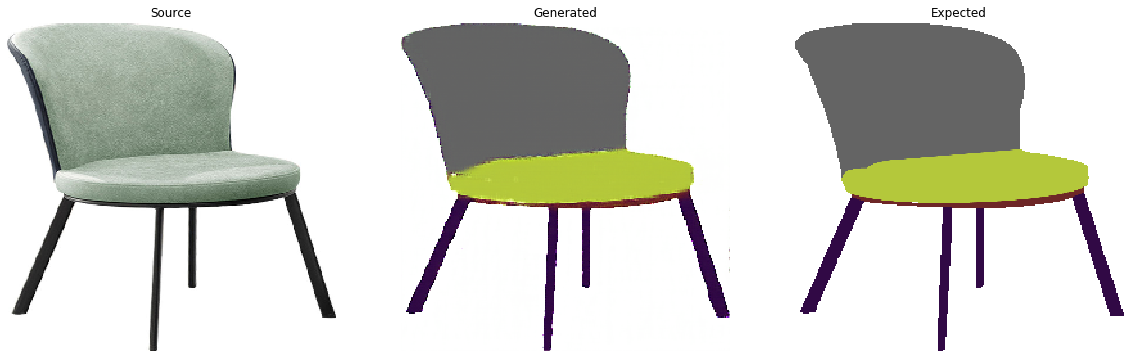

PSNR:  19.540026


In [51]:
# plot all three images
plot_images(src_image, gen_image, tar_image)
gen_image = model.predict(src_image)
print("PSNR: ", PSNR(gen_image, tar_image)[0])

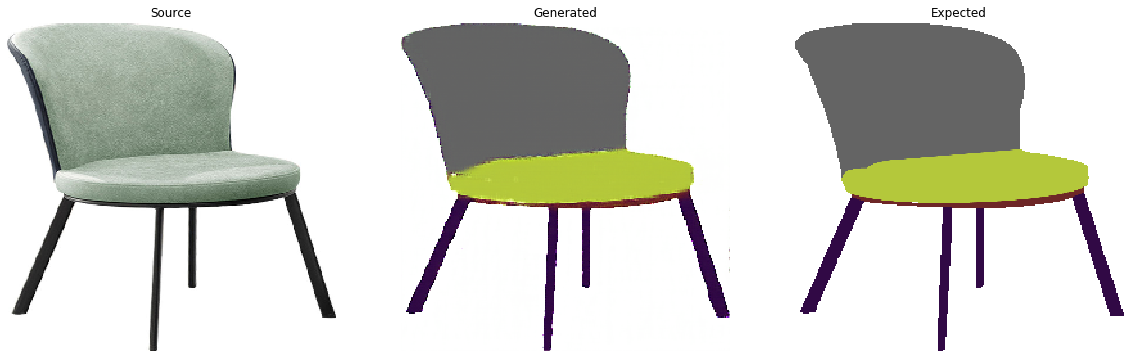

19.540026


In [52]:
# plot all three images
plot_images(src_image, gen_image, tar_image)
gen_image = model.predict(src_image)
print(PSNR(gen_image, tar_image)[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


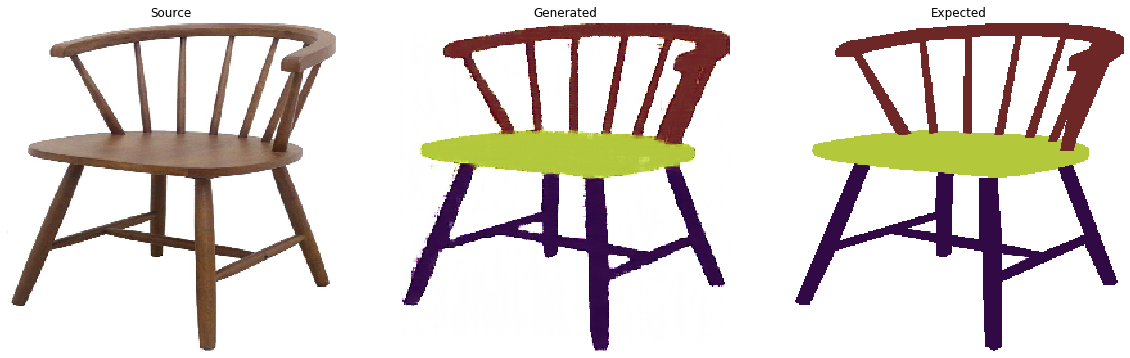

14.432942


In [53]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


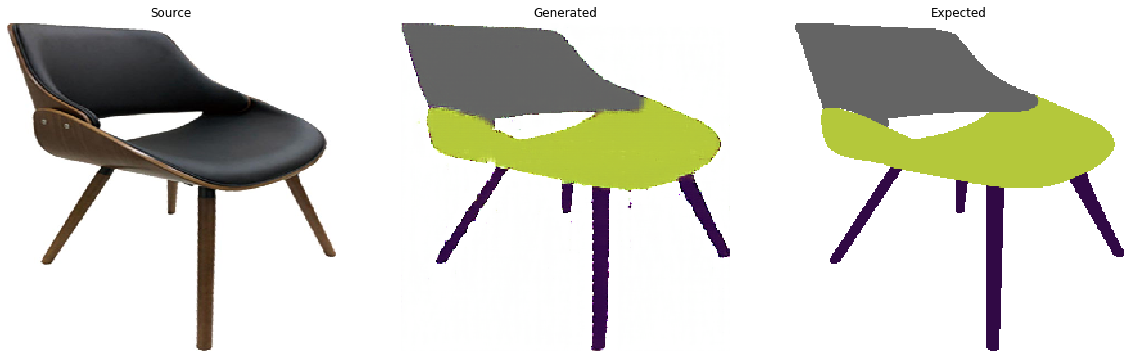

18.291407


In [54]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


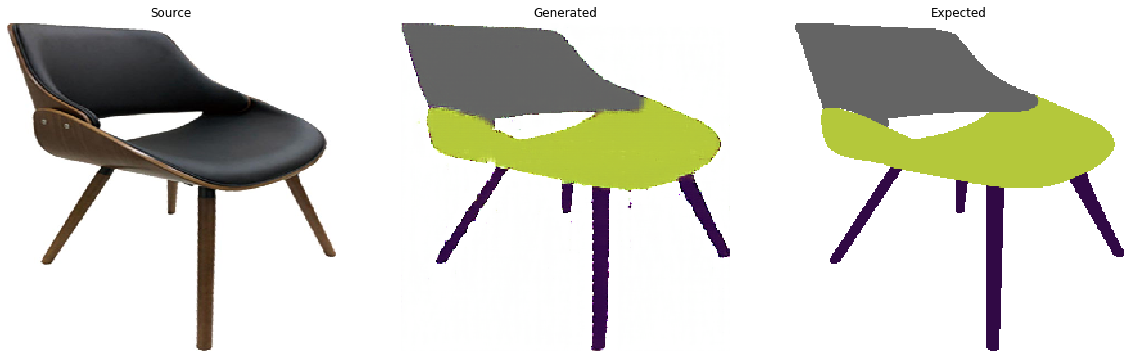

18.291407


In [55]:
# select random example
ix = randint(0, len(X1), 1)
#print(ix)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

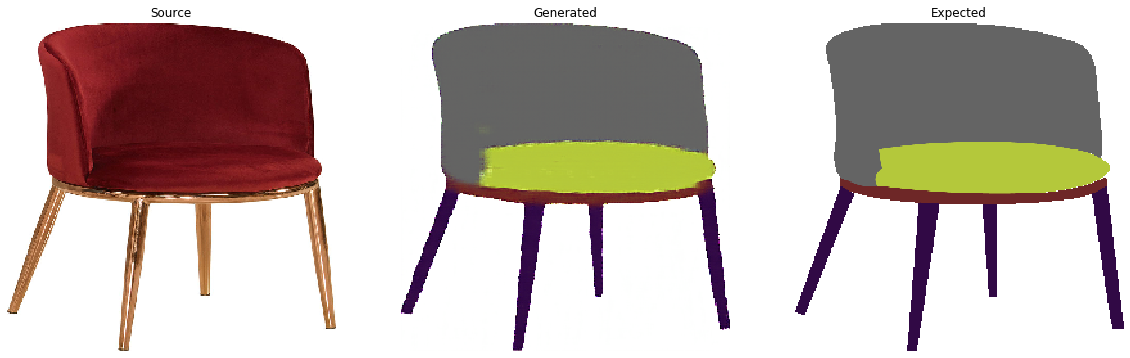

18.278769


In [56]:
# select random example
ix = randint(0, len(X1), 1)
#print(ix)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


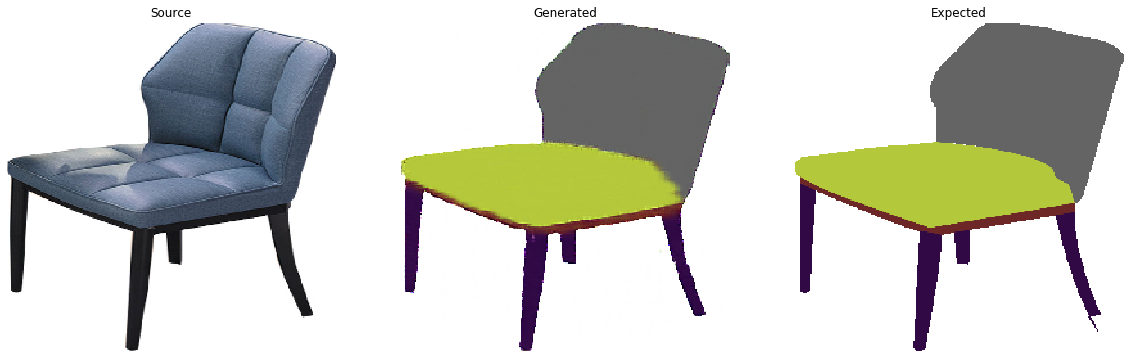

17.566698


In [57]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


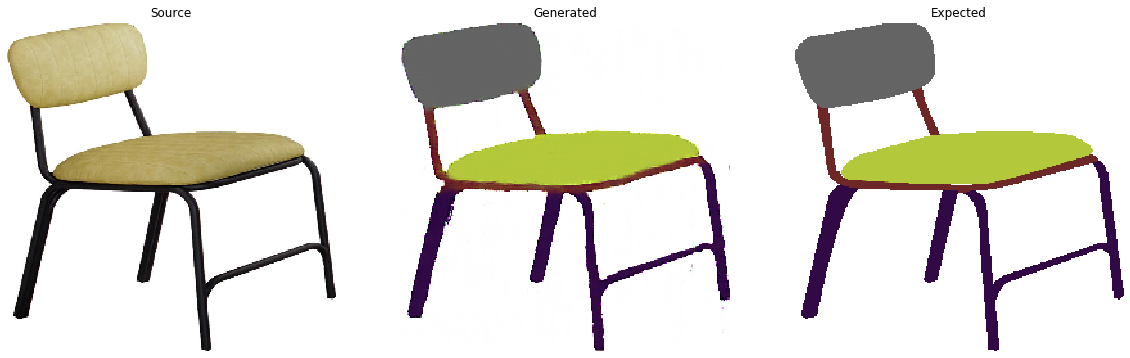

16.447481


In [58]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)
print(PSNR(gen_image, tar_image)[0])

# 4. Training Result

In [59]:
import tensorflow as tf
def PSNR(gen_img, tar_img):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        y=sess.run(tf.image.psnr(gen_img,tar_img,max_val=1))
        return y

In [60]:
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
print(PSNR(gen_image, tar_image))
print(PSNR(gen_image, tar_image)[0])

[17.42218]
17.42218


In [62]:
performance=[]
#for i in range(X1.shape[0]):
for i in range(30):
    #src_image, tar_image = X1[i], X2[i]
    src_image, tar_image = X1[i].reshape(1,256,256,3), X2[i].reshape(1,256,256,3)
    gen_image = model.predict(src_image)
    print(i)
    performance.append(PSNR(gen_image, tar_image)[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [63]:
sum(performance)/len(performance)

17.68378225962321